In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False 

In [3]:
df = pd.read_csv('./datasets/elec_data.csv')

In [4]:
# 널 값 확인
df.isna().sum()

시도            0
시군구           0
계약종별          0
년도            0
월             0
전력 사용량        0
확진자           0
평균기온          0
평균현지기압        0
평균상대습도        0
월합강수량         0
평균풍속          0
합계 일조시간       0
일조율           0
합계 일사량     3087
dtype: int64

In [5]:
# 합계 일사량 column 삭제
df.drop('합계 일사량', axis=1, inplace=True)

In [6]:
# 널 값 확인
df.isna().sum().sum()

0

In [7]:
df

,시도,시군구,계약종별,년도,월,전력 사용량,확진자,평균기온,평균현지기압,평균상대습도,월합강수량,평균풍속,합계 일조시간,일조율
0,서울특별시,종로구,주택용,2015,1,2.414819e+07,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
1,서울특별시,종로구,일반용,2015,1,1.181337e+08,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
2,서울특별시,종로구,교육용,2015,1,9.619909e+06,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
3,서울특별시,종로구,산업용,2015,1,6.580369e+06,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
4,서울특별시,종로구,농사용,2015,1,2.848000e+03,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43916,울산광역시,울주군,교육용,2022,1,9.139668e+06,2164.0,2.6,1012.6,39,0.9,2.3,235.2,75.34
43917,울산광역시,울주군,산업용,2022,1,1.030417e+09,2164.0,2.6,1012.6,39,0.9,2.3,235.2,75.34
43918,울산광역시,울주군,농사용,2022,1,6.842901e+06,2164.0,2.6,1012.6,39,0.9,2.3,235.2,75.34
43919,울산광역시,울주군,가로등,2022,1,2.703994e+06,2164.0,2.6,1012.6,39,0.9,2.3,235.2,75.34


In [8]:
df.describe()

,년도,월,전력 사용량,확진자,평균기온,평균현지기압,평균상대습도,월합강수량,평균풍속,합계 일조시간,일조율
count,43921.000000,43921.000000,4.392100e+04,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000
mean,2018.046265,6.435259,2.544570e+07,1342.984062,13.937419,1007.613834,63.920152,103.340801,2.420605,208.272116,57.190450
std,2.034706,3.482608,7.712822e+07,6418.048896,9.214738,6.492297,10.942686,112.037967,0.643917,42.300588,11.922831
min,2015.000000,1.000000,-3.138182e+06,0.000000,-4.000000,996.000000,39.000000,0.000000,0.900000,69.500000,15.720000
25%,2016.000000,3.000000,9.235820e+05,0.000000,6.300000,1001.300000,56.000000,29.100000,2.000000,182.000000,50.870000
50%,2018.000000,6.000000,3.455774e+06,0.000000,14.500000,1008.600000,63.000000,67.100000,2.400000,208.600000,58.640000
75%,2020.000000,9.000000,2.947823e+07,35.000000,22.400000,1013.500000,72.000000,139.600000,2.900000,233.800000,66.140000
max,2022.000000,12.000000,1.365568e+09,70942.000000,29.000000,1019.700000,94.000000,796.800000,4.000000,316.700000,82.570000


In [9]:
df[df['전력 사용량']<0]['전력 사용량'].value_counts()

-3138182.0    1
-915395.0     1
Name: 전력 사용량, dtype: int64

In [10]:
df['전력 사용량'] = df['전력 사용량'].replace({73111768.0 : 34986793.0, -3138182.0 : 34986793.0, 53994846.0:26539725.5, -915395.0:26539725.5 })

In [11]:
display(df[df['전력 사용량']<0]['시도'].value_counts(), df[df['전력 사용량']<0]['시군구'].value_counts(),
df[df['전력 사용량']<0]['년도'].value_counts(), df[df['전력 사용량']<0]['계약종별'].value_counts())

Series([], Name: 시도, dtype: int64)

Series([], Name: 시군구, dtype: int64)

Series([], Name: 년도, dtype: int64)

Series([], Name: 계약종별, dtype: int64)

In [12]:
# X, y로 나누기
y = df['전력 사용량']
X = df.drop(['전력 사용량', '합계 일조시간'], axis=1)

In [13]:
# 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [14]:
resultID = X_test[['시도', '시군구', '계약종별', '년도', '월']]

In [15]:
X_train.drop('년도', axis=1, inplace=True)

In [16]:
X_test.drop('년도', axis=1, inplace=True)

In [17]:
print('원-핫 인코딩 전', X_test.shape)
test_ohe = pd.get_dummies(X_test)
print('원-핫 인코딩 후', test_ohe.shape)

원-핫 인코딩 전 (13177, 11)
원-핫 인코딩 후 (13177, 75)


In [18]:
print('원-핫 인코딩 전', X_train.shape)
train_ohe = pd.get_dummies(X_train)
print('원-핫 인코딩 후', train_ohe.shape)

원-핫 인코딩 전 (30744, 11)
원-핫 인코딩 후 (30744, 75)


train_ohe

In [19]:
y_test

9123       947706.0
32601     7350302.0
35443     2089079.0
28175     2512408.0
21093    65667818.0
            ...    
24212      779319.0
34452     1034219.0
24681     1034914.0
34405      579856.0
26792     1587139.0
Name: 전력 사용량, Length: 13177, dtype: float64

In [20]:
# 단일 모델의 RMSE 값 반환
def get_rmse(model): # 학습된 모델을 받아서 예측
    pred = model.predict(test_ohe)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)

    print(model.__class__.__name__, 'RMSE :', np.round(rmse, 3))
    
    return rmse

# 여러 모델의 RMSE 값 반환
def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [21]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor()
rf.fit(train_ohe, y_train)

ridge = Ridge()
ridge.fit(train_ohe, y_train)

lasso = Lasso()
lasso.fit(train_ohe, y_train)

models = [rf, ridge, lasso]

get_rmses(models)

RandomForestRegressor RMSE : 6576942.119
Ridge RMSE : 73503132.809
Lasso RMSE : 73502924.908


[6576942.11914648, 73503132.80863336, 73502924.9075508]

In [22]:
y_test.mean()

26660899.232564315

In [23]:
sido = resultID['시도']

In [24]:
sigun = resultID['시군구']

In [25]:
g = resultID['계약종별']

In [26]:
year = resultID['년도']

In [27]:
month = resultID['월']

In [28]:
result = rf.predict(test_ohe)

In [29]:
y_test.isna().sum()

0

In [30]:
# nmae : 오류 찾아보기

<AxesSubplot:xlabel='전력 사용량', ylabel='Count'>

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


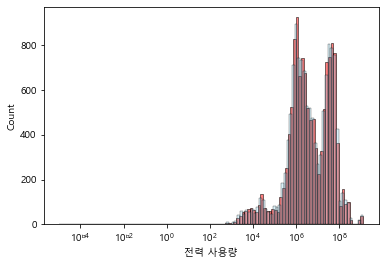

In [31]:
sns.histplot(result, color = 'red', alpha = 0.5,log_scale=True)
sns.histplot(y_test+1e-05, color = 'skyblue', alpha = 0.3, log_scale=True)

In [32]:
from sklearn.metrics import roc_auc_score, r2_score

r2 = r2_score(y_test, result)
print('r2_score : ', r2)

r2_score :  0.9937461192426766


In [33]:
save = pd.DataFrame({'시도': sido, '시군구' : sigun, '계약종별' : g, '년도':year, '월':month, '전력 사용량 예측' : result})
save

,시도,시군구,계약종별,년도,월,전력 사용량 예측
9123,부산광역시,남구,가로등,2016,8,920302.86
32601,서울특별시,성북구,산업용,2020,10,7824262.61
35443,인천광역시,옹진군,주택용,2020,5,2002645.35
28175,부산광역시,북구,교육용,2019,12,2185518.50
21093,부산광역시,해운대구,일반용,2018,4,64705469.90
...,...,...,...,...,...,...
24212,대전광역시,대덕구,가로등,2018,7,799677.54
34452,대구광역시,남구,산업용,2020,1,1080687.35
24681,울산광역시,북구,가로등,2018,9,935751.98
34405,부산광역시,연제구,가로등,2020,12,616968.69


In [34]:
save = save.sort_index()
save

,시도,시군구,계약종별,년도,월,전력 사용량 예측
0,서울특별시,종로구,주택용,2015,1,2.347816e+07
1,서울특별시,종로구,일반용,2015,1,1.135359e+08
4,서울특별시,종로구,농사용,2015,1,5.140030e+03
6,서울특별시,종로구,심 야,2015,1,3.623099e+06
7,서울특별시,중구,주택용,2015,1,1.761102e+07
...,...,...,...,...,...,...
43893,울산광역시,동구,주택용,2022,1,1.992873e+07
43900,울산광역시,중구,주택용,2022,1,2.846080e+07
43903,울산광역시,중구,산업용,2022,1,2.581138e+06
43913,울산광역시,남구,심 야,2022,1,1.768598e+06


In [35]:
save = save.reset_index()
save.drop('index', axis=1, inplace=True)
save

,시도,시군구,계약종별,년도,월,전력 사용량 예측
0,서울특별시,종로구,주택용,2015,1,2.347816e+07
1,서울특별시,종로구,일반용,2015,1,1.135359e+08
2,서울특별시,종로구,농사용,2015,1,5.140030e+03
3,서울특별시,종로구,심 야,2015,1,3.623099e+06
4,서울특별시,중구,주택용,2015,1,1.761102e+07
...,...,...,...,...,...,...
13172,울산광역시,동구,주택용,2022,1,1.992873e+07
13173,울산광역시,중구,주택용,2022,1,2.846080e+07
13174,울산광역시,중구,산업용,2022,1,2.581138e+06
13175,울산광역시,남구,심 야,2022,1,1.768598e+06


ANOVA 분석
* (계약종별 전력 사용량의 차이) => 일원
* (시도별 전력사용량의 차이) => 일원
* (시군구별 전력사용량의 차이) => 일원
* (계약종별 * 시군구) * 전력 사용량의 차이 => 이원
* (계약종별 * 시도) * 전력 사용량의 차이 => 이원

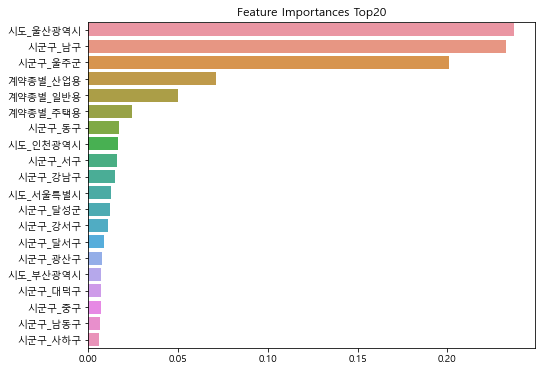

In [36]:
def plot_importances(model, feature_names, top=20):
    import_feature_values = model.feature_importances_ 
    importance = pd.Series(import_feature_values, index=feature_names)
    
    plt.figure(figsize=(8,6))
    plt.title('Feature Importances Top'+str(top))

    feature20 = importance.sort_values(ascending=False)[:top]
    sns.barplot(feature20, feature20.index)

plot_importances(rf, train_ohe.columns, top=20)

In [38]:
train_ohe['시도_울산광역시'].unique()

array([0, 1], dtype=uint8)